<a href="https://colab.research.google.com/github/manchirajurajlakshmi/logistic-regression/blob/main/project_part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset into a pandas DataFrame
file_path = 'Churn (1).xlsx'  # Use the provided file name
data = pd.read_excel(file_path)

# Preview the first few rows of the dataset
data.head()


,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [8]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())


Missing values in each column:
Unnamed: 0        0
state             0
area.code         0
account.length    0
voice.plan        0
voice.messages    0
intl.plan         0
intl.mins         0
intl.calls        0
intl.charge       0
day.mins          0
day.calls         0
day.charge        0
eve.mins          0
eve.calls         0
eve.charge        0
night.mins        0
night.calls       0
night.charge      0
customer.calls    0
churn             0
dtype: int64


In [9]:
# Summary statistics for numerical columns
print("\nSummary statistics of numerical columns:")
print(data.describe())



Summary statistics of numerical columns:
        Unnamed: 0  account.length  voice.messages    intl.mins   intl.calls  \
count  5000.000000      5000.00000     5000.000000  5000.000000  5000.000000   
mean   2500.500000       100.25860        7.755200    10.261780     4.435200   
std    1443.520003        39.69456       13.546393     2.761396     2.456788   
min       1.000000         1.00000        0.000000     0.000000     0.000000   
25%    1250.750000        73.00000        0.000000     8.500000     3.000000   
50%    2500.500000       100.00000        0.000000    10.300000     4.000000   
75%    3750.250000       127.00000       17.000000    12.000000     6.000000   
max    5000.000000       243.00000       52.000000    20.000000    20.000000   

       intl.charge     day.mins    day.calls    eve.calls   eve.charge  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      2.771196   180.288900   100.029400   100.191000    17.054322   
std       0.745

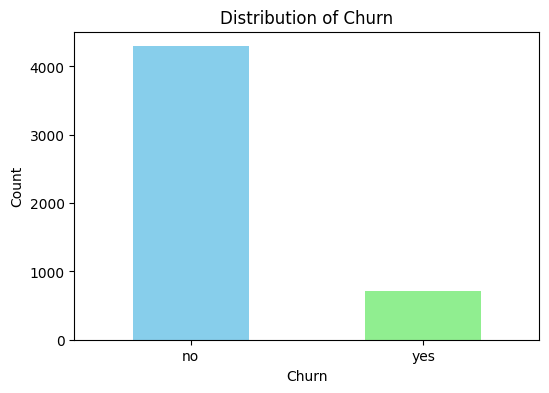

In [10]:
# Distribution of target variable (churn)
churn_distribution = data['churn'].value_counts()

plt.figure(figsize=(6,4))
churn_distribution.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


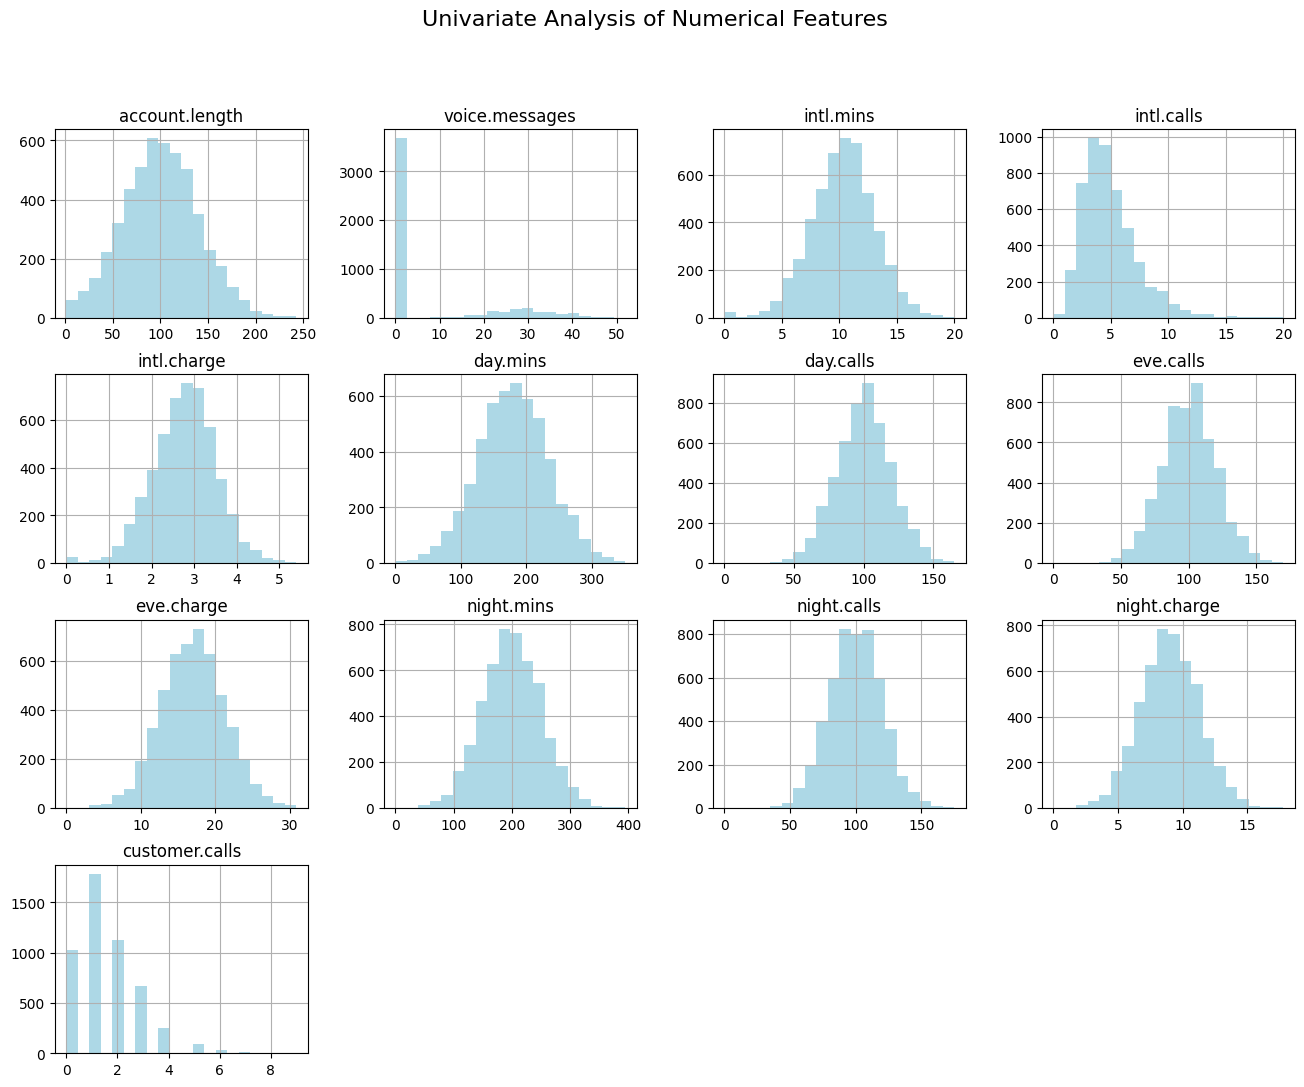

In [11]:
# Univariate analysis of numerical features
numerical_columns = ['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
                     'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
                     'night.mins', 'night.calls', 'night.charge', 'customer.calls']

# Plot histograms for numerical features
data[numerical_columns].hist(figsize=(16,12), bins=20, color='lightblue')
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=16)
plt.show()


In [13]:
# Convert 'churn' to binary (0 for no, 1 for yes)
data['churn_binary'] = data['churn'].apply(lambda x: 1 if x == 'yes' else 0)


In [15]:
# Verify if the 'churn_binary' column was created successfully
data[['churn', 'churn_binary']].head()


,churn,churn_binary
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0


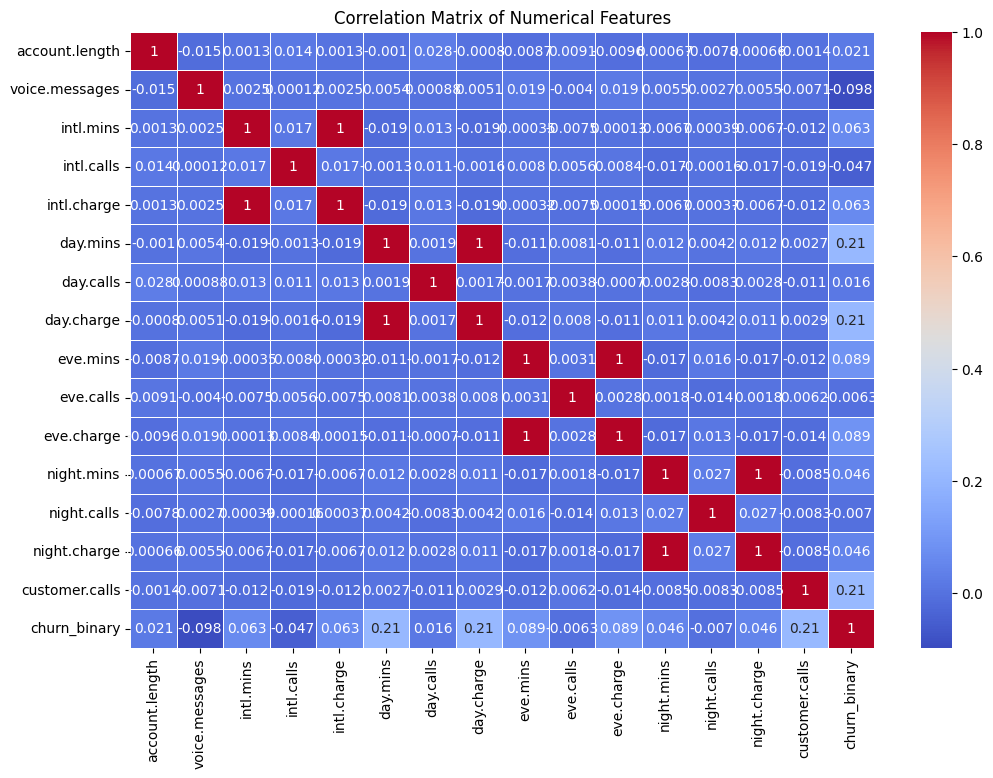

In [14]:
# Correlation matrix for numerical features and churn
correlation_matrix = data[['account.length', 'voice.messages', 'intl.mins', 'intl.calls', 'intl.charge',
                           'day.mins', 'day.calls', 'day.charge', 'eve.mins', 'eve.calls', 'eve.charge',
                           'night.mins', 'night.calls', 'night.charge', 'customer.calls', 'churn_binary']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
